In [32]:
import pandas as pd
import numpy as np
import pickle
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
def pca_trans(train, test, cols, n_comp, prefix='pca', seed=0, svd_solver='randomized', pca_obj=None):
    
    #svd_solver:'randomized' or'full'
    if pca_obj == None: #INFERENCE:
        pca=PCA(n_components=n_comp, random_state=seed,svd_solver=svd_solver)
    else:
        pca=pca_obj

    data = pd.concat([pd.DataFrame(train[cols]), pd.DataFrame(test[cols])])
    pca.fit(data[cols])
    data2  = pca.transform(data[cols])
    train2 = data2[:train.shape[0]]; test2 = data2[-test.shape[0]:]
    train2 = pd.DataFrame(train2, columns=[f'{prefix}-{i}' for i in range(n_comp)])
    test2  = pd.DataFrame(test2, columns=[f'{prefix}-{i}' for i in range(n_comp)])
    train  = pd.concat((train, train2), axis=1)
    test   = pd.concat((test, test2), axis=1)
    print(f'explained_variance_ratio sum:{np.sum(pca.explained_variance_ratio_):.5f},max:{pca.explained_variance_ratio_[0]:.5f},min:{pca.explained_variance_ratio_[-1]:.5f}')

    return train, test, pca

In [34]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'], dtype='object')

# Irisデータ リード

In [35]:
iris = load_iris()
df_iris = pd.DataFrame(iris['data'], columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
df_iris['target'] = iris['target']
df_iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Text(0.5, 1.0, 'iris sepal length,width')

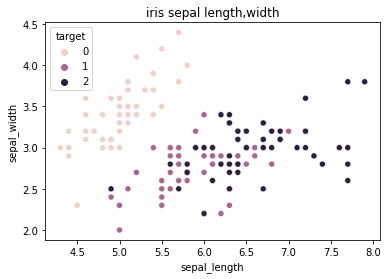

In [36]:
sns.scatterplot(data=df_iris, x='sepal_length', y='sepal_width', hue='target')
plt.title('iris sepal length,width')

# PCA実行

In [37]:
train = df_iris.iloc[:-30]
test  = df_iris.iloc[-30:]

columns=["sepal_length", "sepal_width", "petal_length", "petal_width"]
train, test, pca = pca_trans(train, test, cols=columns, n_comp=2)
train

explained_variance_ratio sum:0.97769,max:0.92462,min:0.05307


,sepal_length,sepal_width,petal_length,petal_width,target,pca-0,pca-1
0,5.1,3.5,1.4,0.2,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,-2.728717,0.326755
...,...,...,...,...,...,...,...
115,6.4,3.2,5.3,2.3,2,1.904456,0.119251
116,6.5,3.0,5.5,1.8,2,1.949689,0.041943
117,7.7,3.8,6.7,2.2,2,3.487055,1.175739
118,7.7,2.6,6.9,2.3,2,3.795645,0.257323


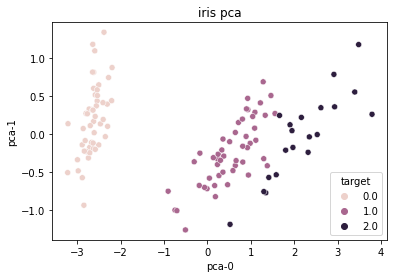

In [39]:
data = pd.concat([train, test], axis=0)
sns.scatterplot(data=data, x='pca-0', y='pca-1', hue='target')
_ = plt.title('iris pca')

# BoFもどき

### 疑似データ生成


In [63]:
import random

# 疑似データ生成
width = 960; height =560
id_num = 100
frame_num = 30 * 3 
df_pose = pd.DataFrame(columns=['id', 'Head_x', 'Head_y', 'Neck_x', 'Neck_y'])

data_num = id_num*frame_num
df_pose['id'] = sum([[id]*frame_num for id in range(id_num)], [])
df_pose['Head_x'] = np.random.randint(0,width, data_num)
df_pose['Head_y'] = np.random.randint(0,height, data_num)
df_pose['Neck_x'] = np.random.randint(0,width, data_num)
df_pose['Neck_y'] = np.random.randint(0,height, data_num)

print(f'shape:{df_pose.shape}')
df_pose.head(5)

shape:(9000, 5)


,id,Head_x,Head_y,Neck_x,Neck_y
0,0,45,267,825,411
1,0,653,317,444,364
2,0,41,262,560,195
3,0,88,428,176,146
4,0,389,232,700,209


# BoF メイン


240.0 140.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


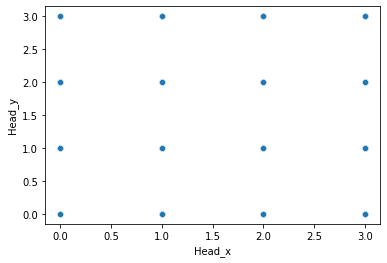

In [66]:
div_num_x = 4; div_num_y =4
x_step = width/div_num_x
y_step = height/div_num_y

print(step_x, step_y)
ser_t1 = df_pose['Head_x']//x_step
ser_t2 = df_pose['Head_y']//y_step
sns.scatterplot(ser_t1, ser_t2)

In [91]:
x_grids = np.arange(div_num_x) * x_step + x_step/2
y_grids = np.arange(div_num_y) * y_step + y_step/2
x_grids, y_grids = np.meshgrid(x_grids, y_grids)
center_grids = np.vstack([x_grids.flatten(),y_grids.flatten()]).T
center_grids

array([[120.,  70.],
       [360.,  70.],
       [600.,  70.],
       [840.,  70.],
       [120., 210.],
       [360., 210.],
       [600., 210.],
       [840., 210.],
       [120., 350.],
       [360., 350.],
       [600., 350.],
       [840., 350.],
       [120., 490.],
       [360., 490.],
       [600., 490.],
       [840., 490.]])

In [130]:
df_t

id  Head_pos
90  7.0         15
73  6.0         15
62  15.0        14
99  8.0         13
72  3.0         13
                ..
42  6.0          1
91  12.0         1
19  8.0          1
    12.0         1
0   0.0          1
Length: 1595, dtype: int64

In [180]:
def func_point(df):
    return (df.iloc[:,0]//x_step * div_num_y) + df.iloc[:,1]//y_step

id_grids = np.arange(id_num)
pos_grids = np.arange(div_num_x*div_num_y)
pos_grids, id_grids  = np.meshgrid(pos_grids, id_grids)

col = 'Head'
df_pose['pos'] = (df_pose[col+'_x']//x_step * div_num_y) + df_pose[col+'_y']//y_step
df_t = df_pose[['id', 'pos']].value_counts().reset_index()
df_t.columns = ['id', 'pos', 'cnt']

df_data = pd.DataFrame()
df_data['id'] = id_grids.flatten()
df_data['pos'] = pos_grids.flatten()
df_data = df_data.merge(df_t, on=['id','pos'], how='left').fillna(0)
df_data = df_data.set_index(['id', 'pos']).unstack()
df_data.columns = [col+f'_pos{i}'for i in range(div_num_x*div_num_y)]
df_data = df_data.T.apply(lambda x : x/x.sum()).T
df_data = df_data.reset_index()
df_data

,id,Head_pos0,Head_pos1,Head_pos2,Head_pos3,Head_pos4,Head_pos5,Head_pos6,Head_pos7,Head_pos8,Head_pos9,Head_pos10,Head_pos11,Head_pos12,Head_pos13,Head_pos14,Head_pos15
0,0,0.011111,0.111111,0.044444,0.088889,0.055556,0.111111,0.022222,0.111111,0.077778,0.055556,0.044444,0.066667,0.088889,0.066667,0.033333,0.011111
1,1,0.044444,0.088889,0.011111,0.055556,0.122222,0.044444,0.066667,0.033333,0.044444,0.055556,0.066667,0.100000,0.055556,0.088889,0.033333,0.088889
2,2,0.066667,0.055556,0.066667,0.055556,0.100000,0.033333,0.100000,0.055556,0.077778,0.066667,0.033333,0.066667,0.033333,0.077778,0.088889,0.022222
3,3,0.044444,0.066667,0.077778,0.111111,0.044444,0.077778,0.088889,0.044444,0.033333,0.055556,0.033333,0.044444,0.066667,0.044444,0.100000,0.066667
4,4,0.055556,0.055556,0.022222,0.077778,0.077778,0.022222,0.044444,0.022222,0.055556,0.077778,0.077778,0.088889,0.033333,0.100000,0.077778,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.077778,0.055556,0.088889,0.055556,0.055556,0.055556,0.022222,0.100000,0.044444,0.055556,0.033333,0.100000,0.055556,0.055556,0.077778,0.066667
96,96,0.055556,0.066667,0.044444,0.077778,0.044444,0.077778,0.033333,0.033333,0.088889,0.077778,0.055556,0.100000,0.033333,0.088889,0.055556,0.066667
97,97,0.044444,0.033333,0.088889,0.055556,0.066667,0.100000,0.077778,0.077778,0.055556,0.055556,0.066667,0.100000,0.022222,0.011111,0.088889,0.055556
98,98,0.077778,0.066667,0.077778,0.022222,0.044444,0.066667,0.111111,0.044444,0.066667,0.044444,0.044444,0.100000,0.100000,0.022222,0.066667,0.044444


# Gist特徴量 関数化

In [185]:
df_pose

,id,Head_x,Head_y,Neck_x,Neck_y,Head_pos,pos
0,0,45,267,825,411,1.0,1.0
1,0,653,317,444,364,10.0,10.0
2,0,41,262,560,195,1.0,1.0
3,0,88,428,176,146,3.0,3.0
4,0,389,232,700,209,5.0,5.0
...,...,...,...,...,...,...,...
8995,99,83,6,18,546,0.0,0.0
8996,99,307,305,291,456,6.0,6.0
8997,99,74,401,466,555,2.0,2.0
8998,99,22,392,637,554,2.0,2.0


In [193]:
def fe_gist(df, col, id_num, x_step, y_step, div_num_x, div_num_y):

    # posion毎の頻度計算
    df_t = df.copy()
    df['pos'] = (df_t[col+'_x']//x_step * div_num_y) + df_t[col+'_y']//y_step
    df_t = df_t[['id', 'pos']].value_counts().reset_index()
    df_t.columns = ['id', 'pos', 'cnt']

    # gist特徴量のDtaFrame作成
    id_grids = np.arange(id_num)
    pos_grids = np.arange(div_num_x*div_num_y)
    pos_grids, id_grids  = np.meshgrid(pos_grids, id_grids)
    df_data = pd.DataFrame()
    df_data['id'] = id_grids.flatten()
    df_data['pos'] = pos_grids.flatten()

    # 頻度情報のマージ, gist化
    df_data = df_data.merge(df_t, on=['id','pos'], how='left').fillna(0)
    df_data = df_data.set_index(['id', 'pos']).unstack()
    df_data.columns = [col+f'_pos{i}'for i in range(div_num_x*div_num_y)]
    df_data = df_data.T.apply(lambda x : x/x.sum()).T
    #df_data = df_data.reset_index()#.drop('id', axis=1)
    return df_data

tmp_list = []
for col in ['Head', 'Neck']:
  tmp_list.append(fe_gist(df_pose, col, id_num, x_step, y_step, div_num_x, div_num_y))
pd.concat(tmp_list, join='inner', axis=1)

,Head_pos0,Head_pos1,Head_pos2,Head_pos3,Head_pos4,Head_pos5,Head_pos6,Head_pos7,Head_pos8,Head_pos9,Head_pos10,Head_pos11,Head_pos12,Head_pos13,Head_pos14,Head_pos15,Neck_pos0,Neck_pos1,Neck_pos2,Neck_pos3,Neck_pos4,Neck_pos5,Neck_pos6,Neck_pos7,Neck_pos8,Neck_pos9,Neck_pos10,Neck_pos11,Neck_pos12,Neck_pos13,Neck_pos14,Neck_pos15
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.022222,0.033333,0.100000,0.077778,0.022222,0.066667,0.077778,0.088889,0.044444,0.133333,0.066667,0.055556,0.066667,0.033333,0.066667,0.044444,0.011111,0.111111,0.044444,0.088889,0.055556,0.111111,0.022222,0.111111,0.077778,0.055556,0.044444,0.066667,0.088889,0.066667,0.033333,0.011111
1,0.033333,0.066667,0.122222,0.044444,0.111111,0.066667,0.077778,0.044444,0.055556,0.100000,0.066667,0.088889,0.000000,0.044444,0.022222,0.055556,0.044444,0.088889,0.011111,0.055556,0.122222,0.044444,0.066667,0.033333,0.044444,0.055556,0.066667,0.100000,0.055556,0.088889,0.033333,0.088889
2,0.088889,0.044444,0.088889,0.022222,0.011111,0.055556,0.055556,0.077778,0.088889,0.044444,0.088889,0.122222,0.044444,0.044444,0.066667,0.055556,0.066667,0.055556,0.066667,0.055556,0.100000,0.033333,0.100000,0.055556,0.077778,0.066667,0.033333,0.066667,0.033333,0.077778,0.088889,0.022222
3,0.033333,0.055556,0.077778,0.044444,0.033333,0.011111,0.088889,0.088889,0.077778,0.111111,0.088889,0.088889,0.066667,0.022222,0.055556,0.055556,0.044444,0.066667,0.077778,0.111111,0.044444,0.077778,0.088889,0.044444,0.033333,0.055556,0.033333,0.044444,0.066667,0.044444,0.100000,0.066667
4,0.055556,0.066667,0.100000,0.022222,0.033333,0.055556,0.044444,0.066667,0.055556,0.044444,0.077778,0.088889,0.111111,0.066667,0.044444,0.066667,0.055556,0.055556,0.022222,0.077778,0.077778,0.022222,0.044444,0.022222,0.055556,0.077778,0.077778,0.088889,0.033333,0.100000,0.077778,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.011111,0.088889,0.088889,0.044444,0.055556,0.055556,0.066667,0.033333,0.088889,0.066667,0.077778,0.055556,0.044444,0.066667,0.055556,0.100000,0.077778,0.055556,0.088889,0.055556,0.055556,0.055556,0.022222,0.100000,0.044444,0.055556,0.033333,0.100000,0.055556,0.055556,0.077778,0.066667
96,0.066667,0.077778,0.055556,0.077778,0.055556,0.077778,0.077778,0.033333,0.111111,0.077778,0.033333,0.066667,0.066667,0.033333,0.033333,0.055556,0.055556,0.066667,0.044444,0.077778,0.044444,0.077778,0.033333,0.033333,0.088889,0.077778,0.055556,0.100000,0.033333,0.088889,0.055556,0.066667
97,0.088889,0.033333,0.044444,0.077778,0.111111,0.122222,0.055556,0.100000,0.055556,0.055556,0.044444,0.077778,0.033333,0.011111,0.077778,0.011111,0.044444,0.033333,0.088889,0.055556,0.066667,0.100000,0.077778,0.077778,0.055556,0.055556,0.066667,0.100000,0.022222,0.011111,0.088889,0.055556


In [191]:
tmp_list[1]

,Neck_pos0,Neck_pos1,Neck_pos2,Neck_pos3,Neck_pos4,Neck_pos5,Neck_pos6,Neck_pos7,Neck_pos8,Neck_pos9,Neck_pos10,Neck_pos11,Neck_pos12,Neck_pos13,Neck_pos14,Neck_pos15
id,,,,,,,,,,,,,,,,
0,0.011111,0.111111,0.044444,0.088889,0.055556,0.111111,0.022222,0.111111,0.077778,0.055556,0.044444,0.066667,0.088889,0.066667,0.033333,0.011111
1,0.044444,0.088889,0.011111,0.055556,0.122222,0.044444,0.066667,0.033333,0.044444,0.055556,0.066667,0.100000,0.055556,0.088889,0.033333,0.088889
2,0.066667,0.055556,0.066667,0.055556,0.100000,0.033333,0.100000,0.055556,0.077778,0.066667,0.033333,0.066667,0.033333,0.077778,0.088889,0.022222
3,0.044444,0.066667,0.077778,0.111111,0.044444,0.077778,0.088889,0.044444,0.033333,0.055556,0.033333,0.044444,0.066667,0.044444,0.100000,0.066667
4,0.055556,0.055556,0.022222,0.077778,0.077778,0.022222,0.044444,0.022222,0.055556,0.077778,0.077778,0.088889,0.033333,0.100000,0.077778,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.077778,0.055556,0.088889,0.055556,0.055556,0.055556,0.022222,0.100000,0.044444,0.055556,0.033333,0.100000,0.055556,0.055556,0.077778,0.066667
96,0.055556,0.066667,0.044444,0.077778,0.044444,0.077778,0.033333,0.033333,0.088889,0.077778,0.055556,0.100000,0.033333,0.088889,0.055556,0.066667
97,0.044444,0.033333,0.088889,0.055556,0.066667,0.100000,0.077778,0.077778,0.055556,0.055556,0.066667,0.100000,0.022222,0.011111,0.088889,0.055556


In [114]:
#def func(df):
#    vector = [0] * len(center_grids)
#    return ((center_grids - (df['Head_x'], df['Head_y']))**2).sum(axis=1).argmin()

vector = [0] * len(center_grids)
df_t = df_pose[df_pose['id']==0]
for (index, f) in df_t.iterrows():
  vector[((center_grids - (f['Head_x'], f['Head_y']))**2).sum(axis=1).argmin()] += 1
print(vector)
df_t

[1, 5, 7, 8, 10, 10, 6, 6, 4, 2, 3, 3, 8, 10, 6, 1]


,id,Head_x,Head_y,Neck_x,Neck_y
0,0,45,267,825,411
1,0,653,317,444,364
2,0,41,262,560,195
3,0,88,428,176,146
4,0,389,232,700,209
...,...,...,...,...,...
85,0,527,496,661,435
86,0,193,447,777,301
87,0,669,135,452,520
88,0,81,208,253,432


In [113]:
f['Head_x']

45

In [95]:
((center_grids - (100, 300))**2).sum(axis=1).argmin()

8

In [70]:
ids = np.arange(id_num)
x_steps = np.arange(div_num_x)
y_steps = np.arange(div_num_y)

#ids, x_steps, y_steps = np.meshgrid(ids, x_steps, y_steps)
x_steps, y_steps = np.meshgrid(x_steps, y_steps)
df_t = pd.DataFrame()
#df_t['id'] = ids.flatten()
df_t['x'] = x_steps.flatten()
df_t['y'] = y_steps.flatten()
df_t

,x,y
0,0,0
1,1,0
2,2,0
3,3,0
4,0,1
5,1,1
6,2,1
7,3,1
8,0,2
9,1,2


In [55]:
df_t = pd.concat([df_pose['id'], ser_t1, ser_t2], axis=1)
df_t['count'] = 1
df_t.groupby(['id','Head_x', 'Head_y']).count()
df_t2 = 

count
id Head_x Head_y       
0  0.0    0.0         5
          1.0         5
          2.0         4
          3.0         2
          4.0         2
...                 ...
99 3.0    2.0         3
          3.0         3
          4.0         4
          5.0         3
          6.0         4

[2692 rows x 1 columns]

In [61]:
x = np.arange(1, 4)
y = np.arange(1, 4)
z = np.arange(1, 4)

# 3×3×3の三次元格子を生成
X, Y, Z = np.meshgrid(x, y, z)
df_t = pd.DataFrame()
df_t['X'] = X.flatten()
df_t['Y'] = Y.flatten()
df_t['Z'] = Z.flatten()
df_t
#([X.flatten().T,Y.flatten().T, Z.flatten().T])

,X,Y,Z
0,1,1,1
1,1,1,2
2,1,1,3
3,2,1,1
4,2,1,2
5,2,1,3
6,3,1,1
7,3,1,2
8,3,1,3
9,1,2,1
